<a href="https://colab.research.google.com/github/godwinthomas11/Python-codes/blob/main/DS_All_Combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This File Includes
Data Preprocessing
Encoding
Outlier Detection
Normalisation
Visualisation
Filter Feature Selection

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sys
import matplotlib.pyplot as plt
import matplotlib.image as img

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science /Air Quality Benchmark dataset.csv")

In [ ]:
df5 = pd.read_csv("/content/drive/MyDrive/Data Science /Air Quality Benchmark dataset.csv")

In [ ]:
df_new = pd.read_csv("/content/drive/MyDrive/Data Science /Air Quality Benchmark dataset.csv")

In [ ]:
df.head()

,Time_stamp,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
0,2018-12-31 18:30:12,iGude,18.20,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
1,2018-12-31 18:32:41,iGude,19.27,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2,2018-12-31 18:35:11,iGude,18.57,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
3,2018-12-31 18:37:41,iGude,17.85,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
4,2018-12-31 18:40:11,iGude,25.95,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal


In [ ]:
df.tail()

,Time_stamp,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
1230688,2020-02-28 18:09:43,Alt Bornheim Feinstaub,3.10,6.0,1013,56,3.6,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
1230689,2020-02-28 18:14:44,Alt Bornheim Feinstaub,2.35,6.0,1013,56,3.6,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
1230690,2020-02-28 18:19:45,Alt Bornheim Feinstaub,3.20,6.0,1013,56,3.6,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
1230691,2020-02-28 18:24:46,Alt Bornheim Feinstaub,3.25,6.0,1013,56,3.6,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
1230692,2020-02-28 18:29:47,Alt Bornheim Feinstaub,3.05,6.0,1013,56,3.6,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230693 entries, 0 to 1230692
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Time_stamp           1230693 non-null  object 
 1   boxName              1230693 non-null  object 
 2   PM 2.5               1230693 non-null  float64
 3   temp                 1230693 non-null  float64
 4   pressure             1230693 non-null  int64  
 5   humidity             1230693 non-null  int64  
 6   wind_speed           1230693 non-null  float64
 7   Time of Day          1230693 non-null  object 
 8   Peak/NoPeak          1230693 non-null  object 
 9   Day                  1230693 non-null  object 
 10  Week Day             1230693 non-null  object 
 11  Weather              1230693 non-null  object 
 12  Weather Description  1230693 non-null  object 
 13  label                1230693 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1

In [ ]:
df.describe()

,PM 2.5,temp,pressure,humidity,wind_speed
count,1.230693e+06,1.230693e+06,1.230693e+06,1.230693e+06,1.230693e+06
mean,8.343975e+00,9.813300e+00,1.015272e+03,7.533406e+01,3.781297e+00
std,1.244952e+01,7.726966e+00,1.068135e+01,1.876159e+01,2.313942e+00
min,0.000000e+00,-8.910000e+00,9.760000e+02,1.400000e+01,3.100000e-01
25%,2.470000e+00,4.140000e+00,1.009000e+03,6.500000e+01,2.100000e+00
50%,5.000000e+00,8.200000e+00,1.015000e+03,8.000000e+01,3.600000e+00
75%,1.090000e+01,1.469000e+01,1.022000e+03,9.200000e+01,5.100000e+00
max,9.999000e+02,3.928000e+01,1.046000e+03,1.000000e+02,1.750000e+01


In [ ]:
df.sort_index(ascending=True)

,Time_stamp,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
0,2018-12-31 18:30:12,iGude,18.20,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
1,2018-12-31 18:32:41,iGude,19.27,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2,2018-12-31 18:35:11,iGude,18.57,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
3,2018-12-31 18:37:41,iGude,17.85,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
4,2018-12-31 18:40:11,iGude,25.95,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230688,2020-02-28 18:09:43,Alt Bornheim Feinstaub,3.10,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
1230689,2020-02-28 18:14:44,Alt Bornheim Feinstaub,2.35,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
1230690,2020-02-28 18:19:45,Alt Bornheim Feinstaub,3.20,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
1230691,2020-02-28 18:24:46,Alt Bornheim Feinstaub,3.25,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal


In [ ]:
df.sort_index(ascending=False)

,Time_stamp,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
1230692,2020-02-28 18:29:47,Alt Bornheim Feinstaub,3.05,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
1230691,2020-02-28 18:24:46,Alt Bornheim Feinstaub,3.25,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
1230690,2020-02-28 18:19:45,Alt Bornheim Feinstaub,3.20,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
1230689,2020-02-28 18:14:44,Alt Bornheim Feinstaub,2.35,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
1230688,2020-02-28 18:09:43,Alt Bornheim Feinstaub,3.10,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2018-12-31 18:40:11,iGude,25.95,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
3,2018-12-31 18:37:41,iGude,17.85,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2,2018-12-31 18:35:11,iGude,18.57,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
1,2018-12-31 18:32:41,iGude,19.27,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal


In [ ]:
df['label'].value_counts()

normal      1169326
abnormal      61367
Name: label, dtype: int64

In [ ]:
df.isnull().sum()

Time_stamp             0
boxName                0
PM 2.5                 0
temp                   0
pressure               0
humidity               0
wind_speed             0
Time of Day            0
Peak/NoPeak            0
Day                    0
Week Day               0
Weather                0
Weather Description    0
label                  0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop('Time_stamp',axis=1,inplace=True)

In [ ]:
df.head()

,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
0,iGude,18.20,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
1,iGude,19.27,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2,iGude,18.57,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
3,iGude,17.85,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
4,iGude,25.95,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal


In [ ]:
df1 = df[df['label'] == 'normal']
df1 = df1.sample(n=None,frac=0.1,replace=False,weights=None,random_state=None,axis=0)

df2 = df[df['label'] == 'abnormal']
df2 = df2.sample(n=None,frac=0.1,replace=False,weights=None,random_state=None,axis=0)

df3 = df1.append(df2)

In [ ]:
df3['label'].value_counts()

normal      116933
abnormal      6137
Name: label, dtype: int64

In [ ]:
df = df3

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Time of Day'] = le.fit_transform(df['Time of Day'])
df.head()

,Time_stamp,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
483952,2019-09-11 16:48:59,FeinstaubFFM,2.13,21.10,1022,43,7.20,0,Peak,Wednesday,Workday,Clouds,overcast clouds,normal
260163,2019-02-22 18:35:48,Bernem,10.67,8.39,1037,76,4.63,1,Peak,Friday,Workday,Clouds,few clouds,normal
187290,2019-11-21 08:48:45,Rothschildallee,13.65,1.08,1010,96,2.10,2,Peak,Thursday,Workday,Clouds,few clouds,normal
622222,2019-05-04 15:57:07,Frankfurt_Riederwald,1.03,7.80,1010,66,2.57,0,No_Peak,Saturday,Weekend,Rain,proximity shower rain,normal
758873,2020-01-02 08:38:15,Frankfurt_Riederwald,25.52,-1.50,1030,100,1.50,2,Peak,Thursday,Workday,Mist,mist,normal


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['boxName'] = le.fit_transform(df['boxName'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Peak/NoPeak'] = le.fit_transform(df['Peak/NoPeak'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Day'] = le.fit_transform(df['Day'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Week Day'] = le.fit_transform(df['Week Day'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Weather'] = le.fit_transform(df['Weather'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Weather Description'] = le.fit_transform(df['Weather Description'])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [ ]:
df.head()

,Time_stamp,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
975383,2019-10-28 13:20:28,12,18.40,6.99,1021,93,2.60,0,0,1,1,1,0,1
277433,2019-04-14 03:27:10,1,35.70,2.38,1020,87,4.12,3,0,3,0,15,30,1
354085,2019-11-24 05:25:20,1,21.50,3.63,1004,93,1.50,3,0,3,0,1,42,1
999053,2019-12-10 23:03:40,12,8.40,1.34,1020,86,2.10,3,0,5,1,1,42,1
727642,2019-11-04 14:08:43,4,1.93,11.41,989,93,4.10,0,0,1,1,11,23,1


In [ ]:
df.drop('Time_stamp',axis=1,inplace=True)

In [ ]:
df.head()

,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
975383,12,18.40,6.99,1021,93,2.60,0,0,1,1,1,0,1
277433,1,35.70,2.38,1020,87,4.12,3,0,3,0,15,30,1
354085,1,21.50,3.63,1004,93,1.50,3,0,3,0,1,42,1
999053,12,8.40,1.34,1020,86,2.10,3,0,5,1,1,42,1
727642,4,1.93,11.41,989,93,4.10,0,0,1,1,11,23,1


In [ ]:
df5.head()

,Time_stamp,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
0,2018-12-31 18:30:12,iGude,18.20,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
1,2018-12-31 18:32:41,iGude,19.27,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2,2018-12-31 18:35:11,iGude,18.57,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
3,2018-12-31 18:37:41,iGude,17.85,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
4,2018-12-31 18:40:11,iGude,25.95,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal


In [ ]:
#One Hot Encoding
df5 = pd.get_dummies(df5,prefix=['label'],columns=['label'])
df5.head()

,Time_stamp,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label_abnormal,label_normal
0,2018-12-31 18:30:12,iGude,18.20,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,0,1
1,2018-12-31 18:32:41,iGude,19.27,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,0,1
2,2018-12-31 18:35:11,iGude,18.57,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,0,1
3,2018-12-31 18:37:41,iGude,17.85,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,0,1
4,2018-12-31 18:40:11,iGude,25.95,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,0,1


In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.1 MB/s eta 0:00:00


In [ ]:
#Target/Mean Encoding
from category_encoders import TargetEncoder
tc = TargetEncoder()
values = tc.fit_transform(X=df5.boxName, y=df5.temp)
df5 = pd.concat([df5,values],axis=1)
df5.head()

,Time_stamp,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label_abnormal,label_normal,boxName
0,2018-12-31 18:30:12,iGude,18.20,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,0,1,3.230688
1,2018-12-31 18:32:41,iGude,19.27,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,0,1,3.230688
2,2018-12-31 18:35:11,iGude,18.57,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,0,1,3.230688
3,2018-12-31 18:37:41,iGude,17.85,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,0,1,3.230688
4,2018-12-31 18:40:11,iGude,25.95,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,0,1,3.230688


In [ ]:
df.head()

,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
192326,9,3.53,6.37,1022,65,1.0,0,0,2,0,1,51,1
973124,12,14.17,17.41,1008,77,1.5,0,0,4,1,1,5,1
177504,9,14.00,14.94,1014,82,3.1,0,0,6,1,1,42,1
365180,1,4.03,6.96,1006,93,2.6,3,0,1,1,11,23,1
322232,1,4.17,23.18,1022,46,3.1,1,1,0,1,0,53,1


<Axes: xlabel='temp'>

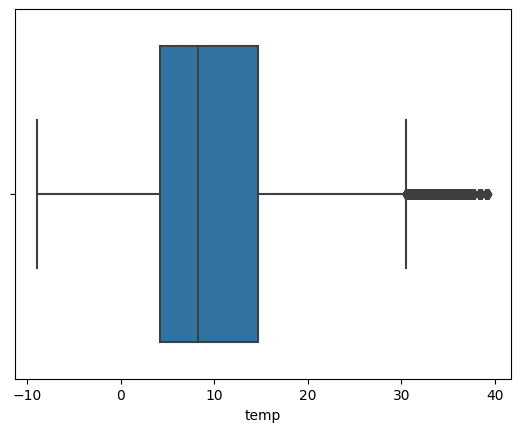

In [ ]:
sys.boxplot(x='temp',data=df)

<Axes: xlabel='label', ylabel='count'>

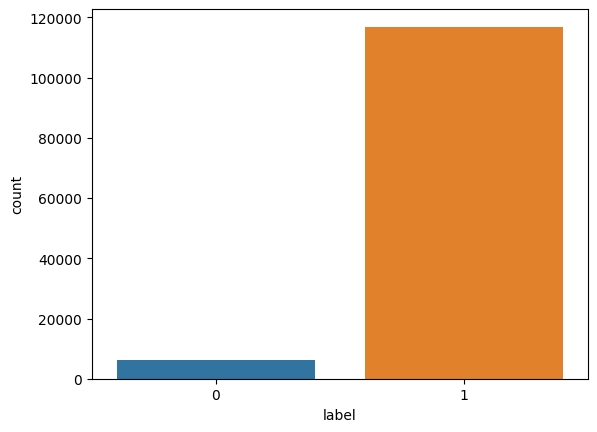

In [ ]:
sys.countplot(x='label',data=df)

<Axes: xlabel='temp', ylabel='humidity'>

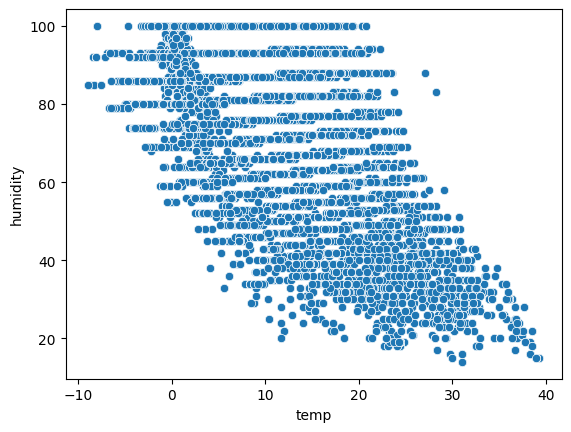

In [ ]:
sys.scatterplot(x='temp',y='humidity',data=df)

<Axes: xlabel='temp', ylabel='humidity'>

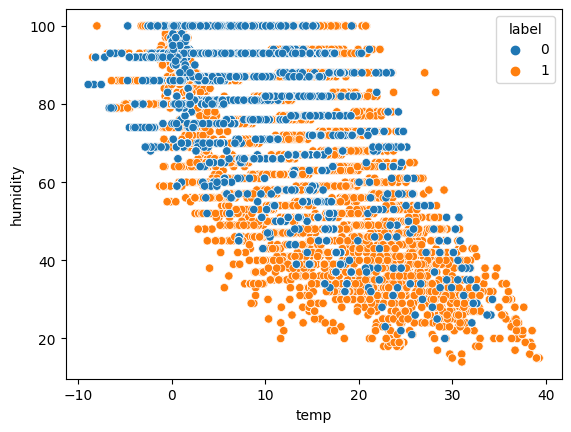

In [ ]:
sys.scatterplot(x='temp',y='humidity',data=df,hue='label')

<Axes: xlabel='temp', ylabel='humidity'>

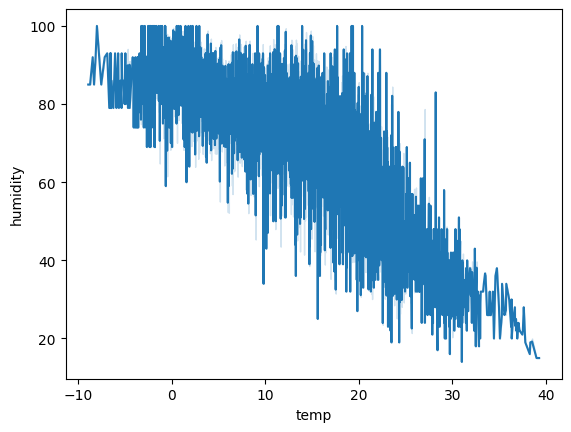

In [ ]:
sys.lineplot(x='temp',y='humidity',data=df)

<Axes: xlabel='label', ylabel='temp'>

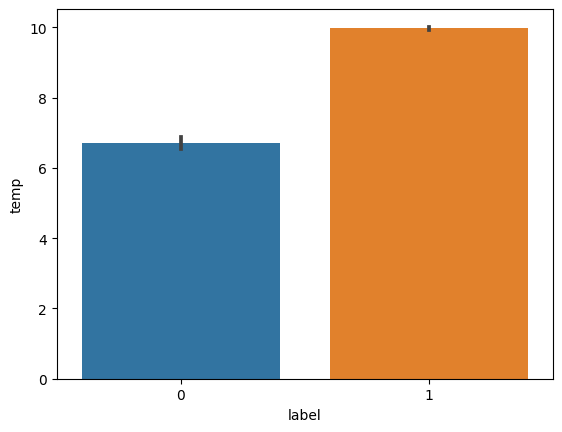

In [ ]:
sys.barplot(x='label',y='temp',data=df)

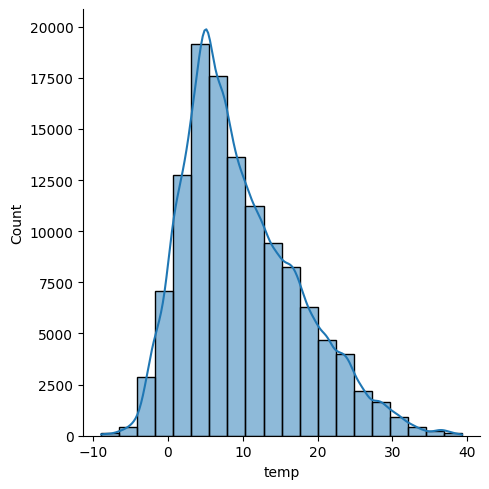

In [ ]:
sys.displot(x='temp',bins=20,kde=True,data=df)

In [ ]:
df.head()

,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
9157,10,1.62,5.70,1003,93,5.14,2,0,4,1,1,51,1
405711,3,1.57,0.90,1035,64,2.57,1,1,6,1,0,53,1
372629,1,15.03,-2.65,1036,92,0.50,3,0,1,1,1,5,1
743016,4,12.98,1.25,1028,100,1.00,3,0,5,1,1,42,1
30804,9,11.83,1.25,1028,86,3.09,2,1,5,1,1,42,1


In [ ]:
df['temp'].describe()

count    123070.000000
mean          9.817678
std           7.729866
min          -8.910000
25%           4.140000
50%           8.220000
75%          14.680000
max          39.280000
Name: temp, dtype: float64

In [ ]:
#Traditional Method
Highest_Value = df['temp'].mean() + 3 * df['temp'].std()
Lowest_Value = df['temp'].mean() - 3 * df['temp'].std()
print("Highest Value : ",Highest_Value)
print("Lowest Value : ",Lowest_Value)

Highest Value :  33.0072765153091
Lowest Value :  -13.371920864053719


In [ ]:
df[(df['temp']>Highest_Value) | (df['temp']<Lowest_Value)]

,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
668490,4,3.00,36.45,1013,24,2.6,0,0,6,1,0,53,1
652583,4,9.43,36.34,1021,30,3.1,0,0,6,1,0,53,1
668570,4,3.47,36.94,1013,20,3.6,0,1,6,1,0,53,1
920565,12,3.30,35.73,1014,25,1.5,0,0,6,1,0,53,1
669568,4,5.50,33.93,1009,26,2.1,2,0,0,1,1,51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109652,9,12.07,36.34,1021,30,3.1,0,0,6,1,0,53,1
652496,4,7.73,34.61,1022,36,2.6,0,0,6,1,0,53,1
126021,9,4.10,37.20,1014,22,3.1,2,0,4,1,0,53,1
478740,3,1.80,33.72,1018,26,3.6,0,0,5,1,0,53,0


In [ ]:
df['Z-Score'] = (df['temp'] - df['temp'].mean())/df['temp'].std()

In [ ]:
df.head()

,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label,Z-Score
964139,12,3.77,12.54,1008,100,6.20,2,0,5,1,1,42,1,0.350537
559195,4,1.60,3.03,1014,60,7.20,0,1,6,1,1,0,1,-0.880545
367946,1,11.97,4.19,993,100,1.00,2,1,2,0,1,0,1,-0.730382
66226,9,12.73,9.48,1013,61,5.66,2,1,6,1,1,42,1,-0.045584
876756,8,16.02,0.50,1033,80,1.00,2,0,1,1,1,5,1,-1.208057


In [ ]:
df[(df['Z-Score']<-3) | (df['Z-Score']>3)]

,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label,Z-Score
669760,4,5.07,33.29,1005,32,1.5,1,1,0,1,1,5,1,3.036652
651973,4,5.90,33.97,1019,30,3.6,0,0,5,1,1,0,1,3.124679
831661,8,3.87,34.29,1018,30,4.1,0,1,5,1,1,0,1,3.166104
126698,9,4.87,36.71,1006,25,5.1,0,0,0,1,1,5,1,3.479376
125587,9,4.83,36.35,1014,20,1.0,1,1,6,1,0,53,1,3.432774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109583,9,9.53,34.61,1022,36,2.6,0,0,6,1,0,53,1,3.207528
126588,9,5.33,36.29,1008,23,2.6,2,0,0,1,1,0,1,3.425006
109723,9,10.40,33.50,1021,36,4.6,1,1,6,1,0,53,1,3.063837
652534,4,51.93,35.77,1021,34,3.6,0,0,6,1,0,53,0,3.357692


In [ ]:
df.head()

,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
781406,4,2.00,3.90,1011,60,7.7,3,0,5,1,11,23,1
1007364,12,6.40,5.47,1022,87,4.6,1,1,6,1,1,0,1
655747,4,3.50,15.51,1019,67,2.1,3,0,5,1,1,51,1
872435,8,3.12,3.38,998,86,3.1,1,1,4,1,1,0,1
172135,9,8.20,12.88,1013,93,1.0,3,0,1,1,1,5,1


In [ ]:
df_new = df_sample = df

In [ ]:
#IQR

quantile25 = df['temp'].quantile(0.25)
quantile75 = df['temp'].quantile(0.75)
print("25th Quantile : ",quantile25)
print("75th Quantile : ",quantile75)
IQR = quantile75 - quantile25
print("IQR = ",IQR)
highest = quantile75 + 1.5 * IQR
lowest = quantile25 - 1.5*IQR
print("Highest Value = ",highest)
print("Lowest Value = ",lowest)

25th Quantile :  4.13
75th Quantile :  14.64
IQR =  10.510000000000002
Highest Value =  30.405
Lowest Value =  -11.635000000000002


In [ ]:
df[(df['temp']<lowest) | (df['temp']>highest)]

,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
690259,4,9.57,30.80,1013,40,3.1,2,0,2,0,1,51,1
921783,12,4.23,36.71,1006,25,5.1,0,0,0,1,1,5,1
474481,3,7.28,30.71,1018,51,2.1,1,1,5,1,1,42,1
833088,8,6.58,32.74,1012,32,4.6,1,1,3,0,0,53,1
123199,9,5.43,31.00,1012,35,6.7,0,0,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
478720,3,2.23,32.24,1020,29,3.6,0,0,5,1,0,53,0
919993,12,65.20,32.24,1020,29,3.6,0,0,5,1,0,53,0
938894,12,13.30,31.04,1017,38,3.1,0,0,3,0,1,5,0
940673,12,4.87,32.11,1013,27,4.6,0,0,6,1,11,52,0


In [ ]:
df_trim = df[(df['Z-Score'] > -3)| (df['Z-Score'] < 3)]

In [ ]:
df=df_trim

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123070 entries, 483952 to 1010262
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   boxName              123070 non-null  int64  
 1   PM 2.5               123070 non-null  float64
 2   temp                 123070 non-null  float64
 3   pressure             123070 non-null  int64  
 4   humidity             123070 non-null  int64  
 5   wind_speed           123070 non-null  float64
 6   Time of Day          123070 non-null  int64  
 7   Peak/NoPeak          123070 non-null  int64  
 8   Day                  123070 non-null  int64  
 9   Week Day             123070 non-null  int64  
 10  Weather              123070 non-null  int64  
 11  Weather Description  123070 non-null  int64  
 12  label                123070 non-null  int64  
 13  Z-Score              123070 non-null  float64
dtypes: float64(4), int64(10)
memory usage: 14.1 MB


In [ ]:
cap = df_sample
cap['temp'] = np.where(cap['temp']>Highest_Value,Highest_Value,np.where(cap['temp']<Lowest_Value,Lowest_Value,cap['temp']))
cap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123070 entries, 781406 to 1182102
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   boxName              123070 non-null  int64  
 1   PM 2.5               123070 non-null  float64
 2   temp                 123070 non-null  float64
 3   pressure             123070 non-null  int64  
 4   humidity             123070 non-null  int64  
 5   wind_speed           123070 non-null  float64
 6   Time of Day          123070 non-null  int64  
 7   Peak/NoPeak          123070 non-null  int64  
 8   Day                  123070 non-null  int64  
 9   Week Day             123070 non-null  int64  
 10  Weather              123070 non-null  int64  
 11  Weather Description  123070 non-null  int64  
 12  label                123070 non-null  int64  
 13  Z-Score              123070 non-null  float64
dtypes: float64(4), int64(10)
memory usage: 14.1 MB


In [ ]:
df.head()

,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label,Z-Score
964139,12,3.77,12.54,1008,100,6.20,2,0,5,1,1,42,1,0.350537
559195,4,1.60,3.03,1014,60,7.20,0,1,6,1,1,0,1,-0.880545
367946,1,11.97,4.19,993,100,1.00,2,1,2,0,1,0,1,-0.730382
66226,9,12.73,9.48,1013,61,5.66,2,1,6,1,1,42,1,-0.045584
876756,8,16.02,0.50,1033,80,1.00,2,0,1,1,1,5,1,-1.208057


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123070 entries, 964139 to 422584
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   boxName              123070 non-null  int64  
 1   PM 2.5               123070 non-null  float64
 2   temp                 123070 non-null  float64
 3   pressure             123070 non-null  int64  
 4   humidity             123070 non-null  int64  
 5   wind_speed           123070 non-null  float64
 6   Time of Day          123070 non-null  int64  
 7   Peak/NoPeak          123070 non-null  int64  
 8   Day                  123070 non-null  int64  
 9   Week Day             123070 non-null  int64  
 10  Weather              123070 non-null  int64  
 11  Weather Description  123070 non-null  int64  
 12  label                123070 non-null  int64  
 13  Z-Score              123070 non-null  float64
dtypes: float64(4), int64(10)
memory usage: 14.1 MB


In [ ]:
#Normalisation
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

column_names = df.columns.tolist()
# Apply scaling to numerical columns
df_scaled = df.copy()
df_scaled[column_names[1:]] = scaler.fit_transform(df_scaled[column_names[1:]])
df_scaled.head()

,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label,Z-Score
483952,3,0.002424,0.622743,0.657143,0.337209,0.400814,0.000000,1.0,1.000000,1.0,0.045455,0.626866,1.0,0.622743
260163,1,0.012143,0.358996,0.871429,0.720930,0.251309,0.333333,1.0,0.000000,1.0,0.045455,0.074627,1.0,0.358996
187290,9,0.015535,0.207304,0.485714,0.953488,0.104130,0.666667,1.0,0.666667,1.0,0.045455,0.074627,1.0,0.207304
622222,4,0.001172,0.346752,0.485714,0.604651,0.131472,0.000000,0.0,0.333333,0.0,0.500000,0.641791,1.0,0.346752
758873,4,0.029044,0.153766,0.771429,1.000000,0.069226,0.666667,1.0,0.666667,1.0,0.409091,0.552239,1.0,0.153766


# Filter Feature Selection

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #Class to Split data into Training & Testing
from sklearn.linear_model import LogisticRegression #ML MODEL
from sklearn.metrics import accuracy_score # Statistic Metric to Calculate Accuracy

# Separate features and target
X = df.drop('label', axis=1)#Input Features
y = df['label']#Target Feature

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(98456, 13)
(24614, 13)


In [ ]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9460469651417892


In [ ]:
def remove_duplicate_columns(df):
    # Transpose the DataFrame to work with rows instead of columns
    transposed_df = df.transpose()

    # Identify and drop duplicate rows (which correspond to duplicate columns)
    df_no_duplicates = transposed_df.drop_duplicates()

    # Transpose the DataFrame back to the original shape
    df_no_duplicates = df_no_duplicates.transpose()

    return df_no_duplicates


X_train = remove_duplicate_columns(X_train)
X_test = remove_duplicate_columns(X_test)

In [ ]:
#Variance Threshold

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=1.0)
#Keep threshold 0.5 at Start & if you dont get any false values then increase the threshold

In [ ]:
sel.fit(X_train)

VarianceThreshold(threshold=1.0)

In [ ]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True])

In [ ]:
sum(sel.get_support())

11

In [ ]:
columns = X_train.columns[sel.get_support()]

In [ ]:
columns

Index(['boxName', 'PM 2.5', 'temp', 'pressure', 'humidity', 'wind_speed',
       'Time of Day', 'Day', 'Weather', 'Weather Description', 'Z-Score'],
      dtype='object')

In [ ]:
X_train_vt = X_train
X_test_vt = X_test

In [ ]:
X_train_vt = sel.transform(X_train_vt)
X_test_vt = sel.transform(X_test_vt)

X_train_vt = pd.DataFrame(X_train_vt, columns=columns)
X_test_vt = pd.DataFrame(X_test_vt, columns=columns)

In [ ]:
print(X_train_vt.shape)
print(X_test_vt.shape)

(98456, 11)
(24614, 11)


In [ ]:
#Pearsons Coorelation Coefficient
X_train.corr()

,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,Z-Score
boxName,1.000000,-0.034387,0.080006,-0.019921,0.019400,-0.030518,-0.000199,0.004153,0.003408,-0.001795,-0.000117,-0.002175,0.080006
PM 2.5,-0.034387,1.000000,-0.239974,0.160647,0.249125,-0.271786,0.079226,-0.001428,-0.016191,0.008023,0.033818,0.006510,-0.239974
temp,0.080006,-0.239974,1.000000,-0.149090,-0.626554,0.077918,-0.246547,0.023511,-0.017343,-0.040283,-0.118575,0.062680,1.000000
pressure,-0.019921,0.160647,-0.149090,1.000000,-0.114450,-0.297219,0.023981,-0.002303,0.013863,0.038363,-0.316976,0.066601,-0.149090
humidity,0.019400,0.249125,-0.626554,-0.114450,1.000000,-0.284035,0.392828,-0.045232,-0.043855,-0.007987,0.283519,-0.127235,-0.626554
wind_speed,-0.030518,-0.271786,0.077918,-0.297219,-0.284035,1.000000,-0.195223,0.018213,-0.010254,-0.044991,0.181012,-0.052512,0.077918
Time of Day,-0.000199,0.079226,-0.246547,0.023981,0.392828,-0.195223,1.000000,-0.307040,-0.001381,-0.010586,-0.041149,0.004448,-0.246547
Peak/NoPeak,0.004153,-0.001428,0.023511,-0.002303,-0.045232,0.018213,-0.307040,1.000000,0.000892,0.003488,0.016694,-0.019306,0.023511
Day,0.003408,-0.016191,-0.017343,0.013863,-0.043855,-0.010254,-0.001381,0.000892,1.000000,0.157844,-0.010154,-0.002306,-0.017343
Week Day,-0.001795,0.008023,-0.040283,0.038363,-0.007987,-0.044991,-0.010586,0.003488,0.157844,1.000000,-0.000195,-0.013021,-0.040283


<Axes: >

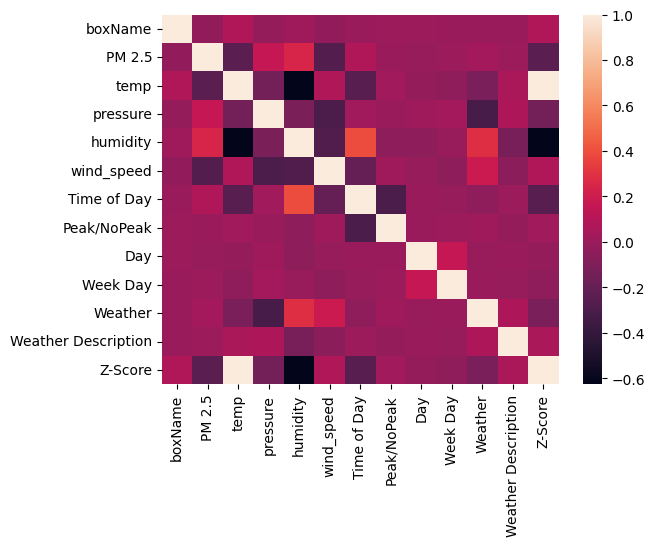

In [ ]:
sys.heatmap(X_train.corr())

In [ ]:
corr_matrix = X_train.corr()

In [ ]:
# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

1


In [ ]:
columns_to_drop = set(columns_to_drop)
len(columns_to_drop)

1

In [ ]:
X_train_pc = X_train
X_test_pc = X_test

In [ ]:
X_train_pc.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test_pc.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [ ]:
print(X_train_pc.shape)
print(X_test_pc.shape)

(98456, 12)
(24614, 12)


**ANOVA**

In [ ]:
X_train

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyBodyGyroMag-skewness(),fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.994425,-0.994873,-0.994886,-0.813863,0.846922,0.691468,0.846423,-0.611174,-0.768785,-0.663066,...,0.043182,0.394506,-0.684497,0.751089,0.626432,0.263401,-0.646225,0.398881,-0.546717,-0.431200
1,-0.326331,0.069663,-0.224321,-0.411806,0.271334,0.039452,0.269204,0.403663,0.180054,0.176069,...,-0.225796,0.052089,-0.131946,0.628099,-0.357089,-0.925512,0.110212,-0.474013,0.383162,0.238969
2,-0.026220,-0.032163,0.393109,0.200747,0.118277,0.072295,0.245986,0.318557,0.135103,0.087680,...,-0.346388,-0.038923,-0.643660,-0.182993,0.484857,-0.961034,0.147325,-0.819001,0.221549,-0.003571
3,-0.981092,-0.901124,-0.960423,-0.807362,0.825370,0.642789,0.815368,-0.376515,-0.171730,-0.496816,...,0.197311,-0.145084,-0.326860,0.205896,-0.168239,-0.197557,0.328892,-0.744428,0.274256,0.031246
4,-0.997380,-0.983893,-0.984482,-0.810993,0.853330,0.687431,0.844895,-0.652548,-0.678458,-0.486837,...,0.310607,0.096524,-0.113724,-0.267371,-0.304399,-0.081555,0.110146,-0.615329,0.322236,0.161577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,-0.555352,-0.104055,-0.438064,-0.373579,0.454289,0.153427,0.475699,0.455070,0.288106,0.191017,...,-0.490616,0.022624,0.417731,-0.155279,-0.137981,0.929236,-0.583898,-0.703989,0.159112,-0.185944
5877,-0.290043,-0.212102,-0.469731,-0.123285,0.123907,0.202561,0.577615,0.345742,0.159941,0.085557,...,-0.846175,-0.039773,-0.021970,-0.019533,-0.896005,-0.039591,0.494178,-0.670139,0.106156,-0.220746
5878,-0.627198,-0.216566,-0.424764,-0.441355,0.530629,0.077330,0.469639,0.436434,0.322259,0.086872,...,-0.609038,0.094031,0.527152,-0.414621,-0.488542,0.095895,-0.297162,-0.856512,0.183547,-0.034939
5879,-0.994825,-0.985314,-0.965857,-0.805684,0.849776,0.688222,0.828575,-0.542681,-0.667647,-0.431412,...,-0.327943,0.539885,-0.889671,-0.079515,0.014291,-0.290347,0.602344,-0.839693,0.081388,-0.098270


# ANOVA

In [ ]:
X_train_anova = X_train
y_train_anova = y_train

In [ ]:
X_test_anova = X_test
y_test_anova = y_test

In [ ]:
from sklearn.feature_selection import f_classif # calculate f_statistic
from sklearn.feature_selection import SelectKBest #To select specific no. of best features


sel = SelectKBest(f_classif, k=5).fit(X_train_anova, y_train_anova)

# display selected feature names
X_train_anova.columns[sel.get_support()]

Index(['PM 2.5', 'temp', 'pressure', 'humidity', 'wind_speed'], dtype='object')

In [ ]:
columns = X_train_anova.columns[sel.get_support()]

In [ ]:
X_train_anova = sel.transform(X_train_anova)
X_test_anova = sel.transform(X_test_anova)
X_train_anova = pd.DataFrame(X_train_anova, columns=columns)
X_test_anova = pd.DataFrame(X_test_anova, columns=columns)

In [ ]:
print(X_train_anova.shape)
print(X_test_anova.shape)

(98456, 5)
(24614, 5)


In [ ]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train_anova, y_train_anova)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_anova)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test_anova, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9450719102949541


In [ ]:
titanic = pd.read_csv('/kaggle/input/titanic/train.csv')[['Pclass','Sex','SibSp','Parch','Embarked','Survived']]
titanic.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0


In [ ]:
ct = pd.crosstab(titanic['Survived'],titanic['Sex'],margins=True)
ct

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(ct)

(263.05057407065567,
 1.0036732821369117e-55,
 4,
 array([[193.47474747, 355.52525253, 549.        ],
        [120.52525253, 221.47474747, 342.        ],
        [314.        , 577.        , 891.        ]]))

In [ ]:
score = []

for feature in titanic.columns[:-1]:

    # create contingency table
    ct = pd.crosstab(titanic['Survived'], titanic[feature])

    # chi_test
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)

<AxesSubplot: >

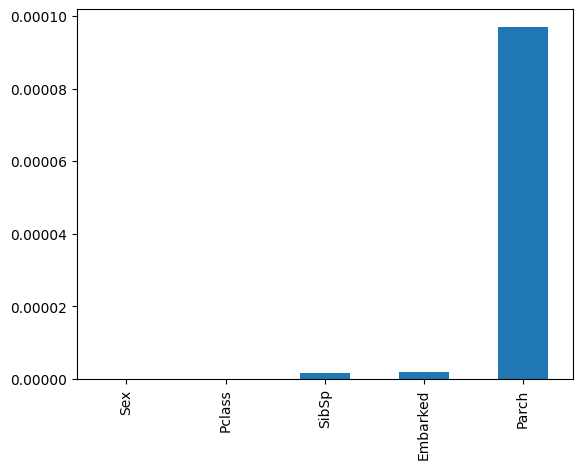

In [ ]:
pd.Series(score, index=titanic.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

# assuming titanic is your DataFrame and 'Survived' is the target column

# Encode categorical variables
le = LabelEncoder()
titanic_encoded = titanic.apply(le.fit_transform)

X = titanic_encoded.drop('Survived', axis=1)
y = titanic_encoded['Survived']

# Calculate chi-squared stats
chi_scores = chi2(X, y)

# chi_scores[1] are the p-values of each feature.
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(inplace = True)

# Plotting the p-values
p_values.plot.bar()

plt.title('Chi-square test - P-values')
plt.xlabel('Feature')
plt.ylabel('P-value')

plt.show()